In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("knn dataset.csv")
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [3]:
data.shape

(310, 7)

In [4]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [7]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


## EDA

In [5]:
import seaborn as sns

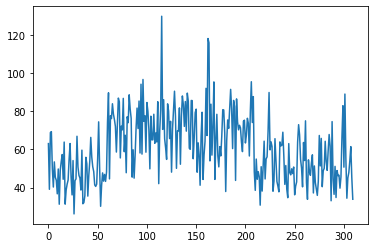

In [10]:
# pelvic_incidence
plt.plot(data.pelvic_incidence)

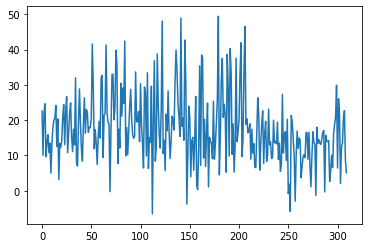

In [11]:
#pelvic_tilt
plt.plot(data.pelvic_tilt)

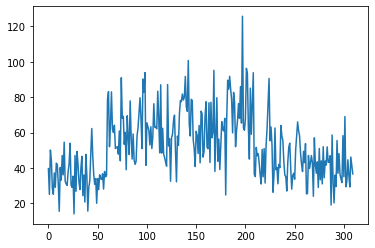

In [12]:
#lumbar_lordosis_angle
plt.plot(data.lumbar_lordosis_angle)

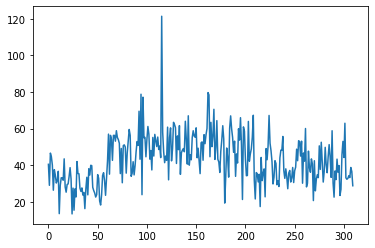

In [13]:
#sacral_slope
plt.plot(data.sacral_slope)

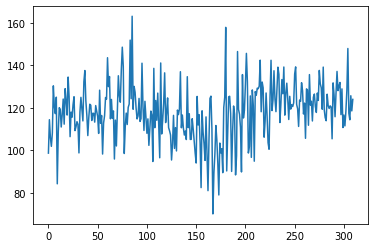

In [15]:
#pelvic_radius
plt.plot(data.pelvic_radius)

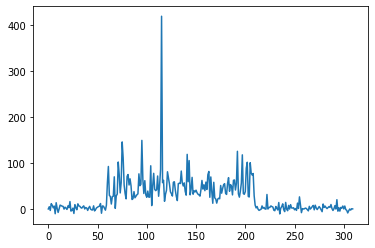

In [16]:
#degree_spondylolisthesis
plt.plot(data.degree_spondylolisthesis)

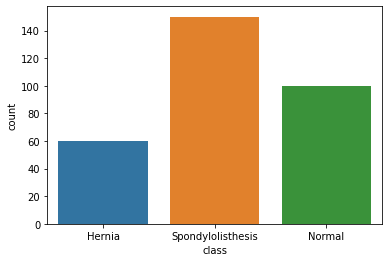

In [18]:
#class
sns.countplot(x = data["class"])

## Feature Engineering

In [19]:
data['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [20]:
data['class'].replace(('Normal','Hernia','Spondylolisthesis'), (0,1,2), inplace = True)
data['class'].value_counts()

2    150
0    100
1     60
Name: class, dtype: int64

In [21]:
X = data.drop('class', axis = 1)
Y = data['class']

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2, random_state = 0)

## Building Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(accuracy_score(ypred,ytest))

0.7419354838709677


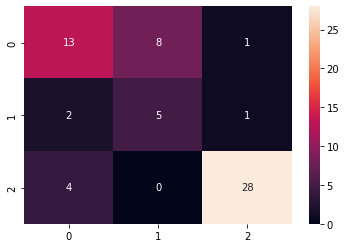

In [27]:
matrix = confusion_matrix(ypred,ytest)
sns.heatmap(matrix, annot = True)

In [29]:
# evaluating KNN for various n_neighbors value
from sklearn.model_selection import cross_val_score
acc_score = []
error_rate = []
for i in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=i)
  scores = cross_val_score(knn, X,Y, scoring = 'accuracy')
  acc_score.append(scores.mean())
  error_rate.append(1-scores.mean())

print("Mean Accuracy: ", np.mean(acc_score) )
print("Error Rate: ", np.mean(error_rate))

Mean Accuracy:  0.7822251481237656
Error Rate:  0.2177748518762343


Text(0.5, 1.0, 'K vs Accuracy')

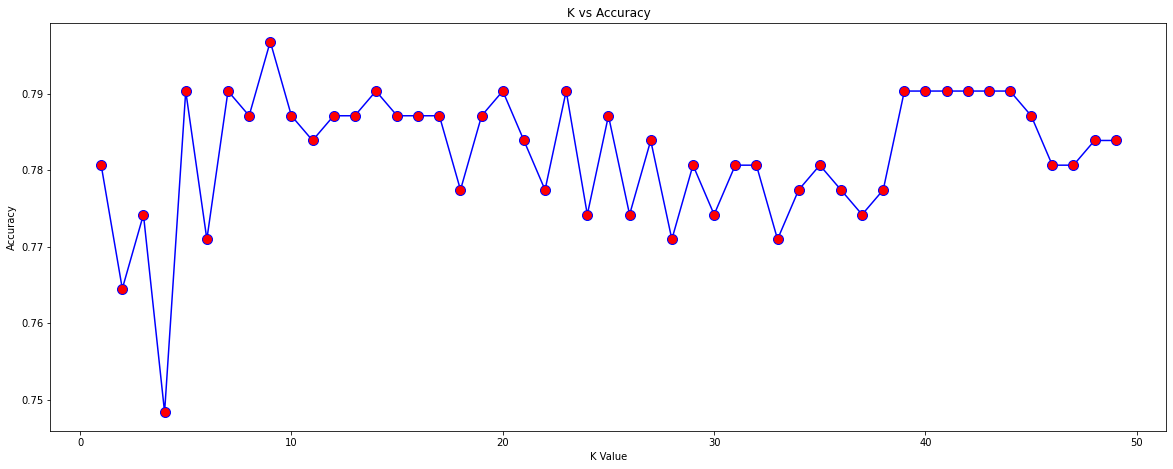

In [30]:
fig, ax = plt.subplots(figsize = (20,7.5))
plt.plot(range(1,50), acc_score, color = 'blue', marker = 'o', markerfacecolor = 'red', linestyle='-', markersize = 10)
plt.xticks(visible = True)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")

In [31]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
print("Accuracy Score: ", accuracy_score(ypred, ytest))

Accuracy Score:  0.7903225806451613
